In [1]:
#Importing all required libraries
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras
from sklearn import metrics
import seaborn as sns
from sklearn import preprocessing
from sklearn import model_selection

In [2]:
#Importing the data
bank_data = pd.read_csv("bank.csv")

In [3]:
bank_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
bank_data.shape

(10000, 14)

In [5]:
bank_data.describe().round(2)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.0
mean,5000.50,15690940.57,650.53,38.92,5.01,76485.89,1.53,0.71,0.52,100090.24,0.2
std,2886.90,71936.19,96.65,10.49,2.89,62397.41,0.58,0.46,0.50,57510.49,0.4
min,1.00,15565701.00,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.0
25%,2500.75,15628528.25,584.00,32.00,3.00,0.00,1.00,0.00,0.00,51002.11,0.0
50%,5000.50,15690738.00,652.00,37.00,5.00,97198.54,1.00,1.00,1.00,100193.92,0.0
75%,7500.25,15753233.75,718.00,44.00,7.00,127644.24,2.00,1.00,1.00,149388.25,0.0
max,10000.00,15815690.00,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.0


In [6]:
#Delete the columns that are not required 
bank_data.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [7]:
bank_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
bank_data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [9]:
#Seeing the unique values and their count in each of the variable in the dataset
for column in bank_data.columns:
     print("\n" + column)
     print(bank_data[column].value_counts())


CreditScore
850    233
678     63
655     54
667     53
705     53
      ... 
412      1
351      1
365      1
373      1
423      1
Name: CreditScore, Length: 460, dtype: int64

Geography
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

Gender
Male      5457
Female    4543
Name: Gender, dtype: int64

Age
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
88      1
82      1
85      1
83      1
Name: Age, Length: 70, dtype: int64

Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

Balance
0.00         3617
105473.74       2
130170.82       2
72594.00        1
139723.90       1
             ... 
130306.49       1
92895.56        1
132005.77       1
166287.85       1
104001.38       1
Name: Balance, Length: 6382, dtype: int64

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

HasCrCard
1    7055
0

In [10]:
#Checking if the data types are correct
bank_data.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [11]:
#Creating dummy variables
data_dummy = pd.get_dummies(bank_data,columns=['Geography','Gender','NumOfProducts'],drop_first=True)

In [12]:
data_dummy.head()

,CreditScore,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,619,42,2,0.00,1,1,101348.88,1,0,0,0,0,0,0
1,608,41,1,83807.86,0,1,112542.58,0,0,1,0,0,0,0
2,502,42,8,159660.80,1,0,113931.57,1,0,0,0,0,1,0
3,699,39,1,0.00,0,0,93826.63,0,0,0,0,1,0,0
4,850,43,2,125510.82,1,1,79084.10,0,0,1,0,0,0,0


In [13]:
#normalizing the variables 'CreditScore','Age','Balance','EstimatedSalary'
norm = preprocessing.MinMaxScaler()
data_dummy[['CreditScore','Age','Balance','EstimatedSalary']] = norm.fit_transform(data_dummy[['CreditScore','Age','Balance','EstimatedSalary']])

In [14]:
data_dummy.head()

,CreditScore,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,0.538,0.324324,2,0.000000,1,1,0.506735,1,0,0,0,0,0,0
1,0.516,0.310811,1,0.334031,0,1,0.562709,0,0,1,0,0,0,0
2,0.304,0.324324,8,0.636357,1,0,0.569654,1,0,0,0,0,1,0
3,0.698,0.283784,1,0.000000,0,0,0.469120,0,0,0,0,1,0,0
4,1.000,0.337838,2,0.500246,1,1,0.395400,0,0,1,0,0,0,0


In [15]:
#Defning the X and y variables
X = data_dummy.drop(['Exited'],axis=1)
y = data_dummy['Exited'] 

In [16]:
#Split the data in 70:30 ratio
x_train,x_test,y_train,y_test = model_selection.train_test_split(X,y,random_state=12,test_size=0.3)

In [17]:
#Creating frame work of the model. With 1 input layer, 1 hidden layer and an output layer with 13, 15, 1 neurons respectively
model=keras.Sequential()
model.add(Dense(13,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [18]:
#Compiling and do the model fit over data with epoch 60 and batch size of 200
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(x_train,y_train,batch_size=200,epochs=60,verbose=1)

Epoch 1/60
35/35 [==============================] - 0s 674us/step - loss: 0.6675 - accuracy: 0.6096
Epoch 2/60
35/35 [==============================] - 0s 620us/step - loss: 0.5338 - accuracy: 0.7997
Epoch 3/60
35/35 [==============================] - 0s 619us/step - loss: 0.4923 - accuracy: 0.8054
Epoch 4/60
35/35 [==============================] - 0s 604us/step - loss: 0.4618 - accuracy: 0.7988
Epoch 5/60
35/35 [==============================] - 0s 635us/step - loss: 0.4332 - accuracy: 0.8078
Epoch 6/60
35/35 [==============================] - 0s 613us/step - loss: 0.4246 - accuracy: 0.8058
Epoch 7/60
35/35 [==============================] - 0s 613us/step - loss: 0.4175 - accuracy: 0.8144
Epoch 8/60
35/35 [==============================] - 0s 625us/step - loss: 0.4163 - accuracy: 0.8164
Epoch 9/60
35/35 [==============================] - 0s 618us/step - loss: 0.4012 - accuracy: 0.8265
Epoch 10/60
35/35 [==============================] - 0s 684us/step - loss: 0.3804 - accuracy: 0.8393

In [19]:
#Calculating Loss and accuracy of the model

loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy: %.3f'  % acc)
print('Loss: %.3f' % loss)

Accuracy: 0.844
Loss: 0.372


In [20]:
#Predicting the y values
y_predict = model.predict(x_test)

In [21]:
#Creating y_pred based on the threshold of 0.5 and appending the values as 0 and 1
y_pred=[]
for threshold in y_predict:
    if threshold>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [22]:
#Creating a confusion matrix
cm = metrics.confusion_matrix(y_test,y_pred)
print(cm)

[[2271   83]
 [ 386  260]]


Text(33.0, 0.5, 'Truth')

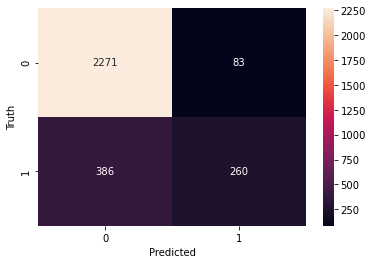

In [23]:
#Visualization of the Confusion Matrix
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [24]:
#Printing all of the metrics in the classification report
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.91      2354
           1       0.76      0.40      0.53       646

    accuracy                           0.84      3000
   macro avg       0.81      0.68      0.72      3000
weighted avg       0.83      0.84      0.82      3000

